# Лабораторная работа №8 (Проведение исследований моделями обнаружения и распознавания объектов)

### 1. Выбранный набор данных  
Название: [Car Plate Detection YOLOv8](https://www.kaggle.com/datasets/nimapourmoradi/car-plate-detection-yolov8)  

Обоснование выбора датасета:  
Датасет подходит для задачи обнаружения объектов (детекции), где необходимо локализовать автомобильные номера на изображениях. Практическая задача — автоматизация обработки парковочных систем, контроль доступа на охраняемые территории, или интеграция в дорожные камеры для фиксации нарушений. Такие системы требуют высокой точности локализации и устойчивости к вариациям освещения, ракурсов и окклюзий, что делает датасет релевантным для исследования.

In [ ]:
import kagglehub

path = kagglehub.dataset_download('nimapourmoradi/car-plate-detection-yolov8')

100%|██████████| 180M/180M [00:04<00:00, 40.9MB/s]

Extracting files...


### 2. Выбор метрик качества
Для оценки эффективности модели YOLOv11 в задаче детекции автомобильных номеров выбраны следующие метрики:  

1. mAP (mean Average Precision)  
   - mAP@0.5: Среднее значение AP при IoU-пороге 0.5.  
   - mAP@0.5:0.95: Усреднение AP по IoU-порогам от 0.5 до 0.95 с шагом 0.05.  
   - Обоснование: mAP учитывает как точность (precision), так и полноту (recall) при различных порогах уверенности модели. Широко используется в задачах детекции объектов для сравнения моделей.  

2. IoU (Intersection over Union)  
   - Мера точности локализации bounding box.  
   - Обоснование: Оценивает корректность предсказанных координат bbox, что критично для задачи обнаружения номеров.  

3. Precision и Recall  
   - Precision: Доля истинных положительных результатов среди всех предсказанных моделью.  
   - Recall: Доля истинных положительных результатов среди всех реальных объектов.  
   - Обоснование: Precision минимизирует ложные срабатывания (важно для систем безопасности), а Recall — пропуски объектов (важно для камер фиксации нарушений).  

### Обоснование выбора метрик  
- mAP и IoU напрямую отражают качество детекции, что соответствует цели работы.  
- Precision/Recall позволяют анализировать типы ошибок модели (ложные срабатывания vs. пропущенные объекты).

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


In [ ]:
# Обучение модели
results = model.train(
    data=f'{path}/data.yaml',  # Путь к вашему data.yaml
    epochs=5,                 # Количество эпох
    imgsz=640,                 # Размер входного изображения
    batch=16,                  # Размер батча
    name='car_plate_detection' # Имя эксперимента
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car_plate_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1858.7±1113.3 MB/s, size: 122.6 KB)


train: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/train/labels... 1287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1287/1287 [00:00<00:00, 2399.46it/s]

train: New cache created: /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 657, len(boxes) = 1380. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 743.6±432.9 MB/s, size: 131.9 KB)


val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/valid/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 1415.47it/s]

val: New cache created: /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/valid/labels.cache


Plotting labels to runs/detect/car_plate_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/car_plate_detection
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.03G      1.076      2.092      1.068         12        640: 100%|██████████| 81/81 [00:27<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         63         63       0.94      0.889      0.977      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.51G      0.944      1.187     0.9793         12        640: 100%|██████████| 81/81 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         63         63      0.951      0.968      0.978      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.52G     0.9378     0.9787     0.9844         12        640: 100%|██████████| 81/81 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         63         63      0.981          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.55G     0.8449     0.7877     0.9574         13        640: 100%|██████████| 81/81 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         63         63      0.984          1      0.991      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.56G     0.7997     0.6946     0.9355         16        640: 100%|██████████| 81/81 [00:26<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63      0.983          1      0.994      0.902



5 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/car_plate_detection/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/car_plate_detection/weights/best.pt, 6.2MB

Validating runs/detect/car_plate_detection/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


                   all         63         63      0.983          1      0.994      0.903
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/car_plate_detection



image 1/1 /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/test/images/192_png.rf.3acead9fe79797208877bfbeec07cc26.jpg: 640x640 1 Plates, 9.1ms
Speed: 4.4ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


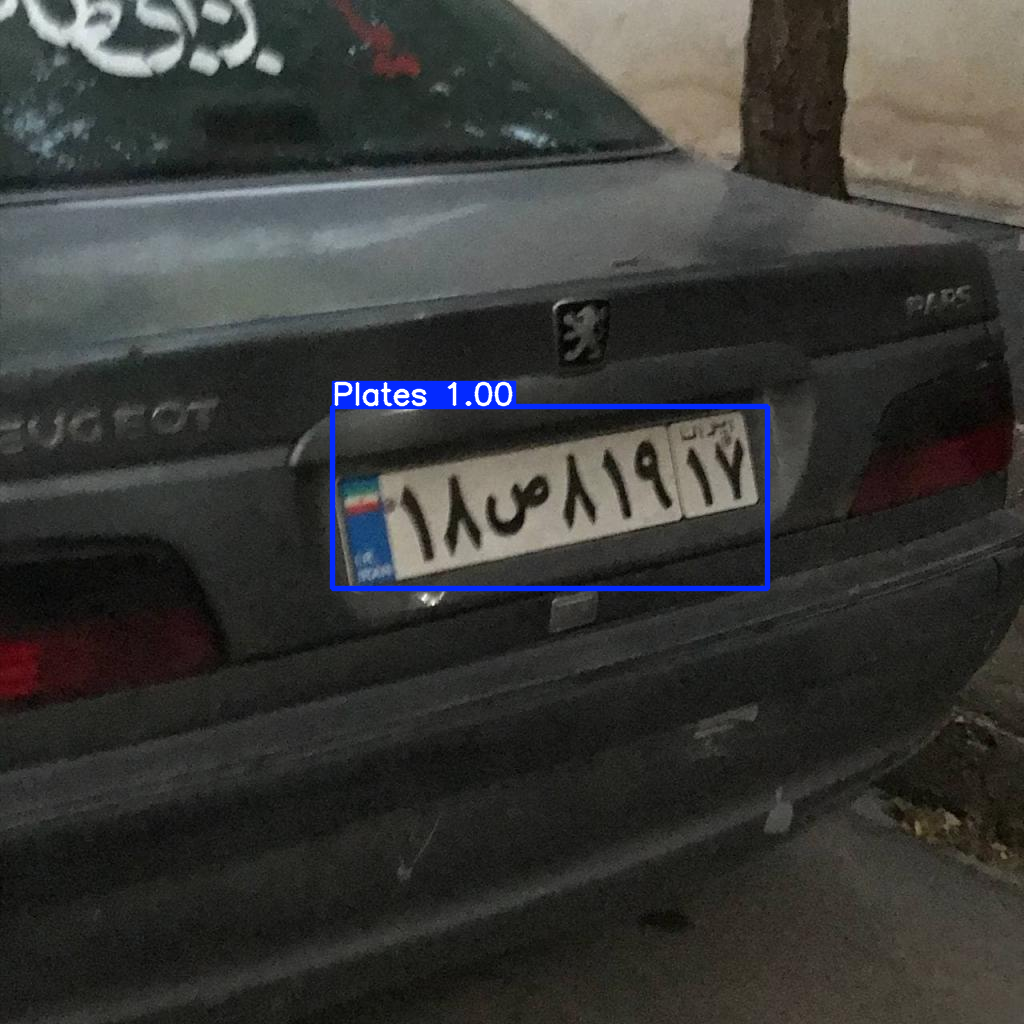

In [ ]:
# Пример детекции на тестовом изображении
results = model(f'{path}/test/images/192_png.rf.3acead9fe79797208877bfbeec07cc26.jpg')
results[0].show()  # Отображение результатов

In [ ]:
model = YOLO('yolo11n.pt')

results = model.train(
    data=f'{path}/data.yaml',
    epochs=5,                 # Количество эпох
    imgsz=640,                 # Размер входного изображения
    batch=16,                  # Размер батча
    name='car_plate_detection' # Имя эксперимента
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car_plate_detection4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ove

train: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/train/labels.cache... 1287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1287/1287 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 657, len(boxes) = 1380. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 533.8±55.1 MB/s, size: 131.9 KB)


val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


Plotting labels to runs/detect/car_plate_detection4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/car_plate_detection4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.54G      1.096      2.286      1.055         12        640: 100%|██████████| 81/81 [00:28<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         63         63      0.947      0.841      0.968      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.92G      0.961      1.329     0.9779         12        640: 100%|██████████| 81/81 [00:26<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         63         63      0.967          1      0.986      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.92G     0.9563      1.111     0.9861         12        640: 100%|██████████| 81/81 [00:26<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         63         63      0.967          1       0.98      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.92G     0.8379     0.8658     0.9451         13        640: 100%|██████████| 81/81 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         63         63      0.978          1       0.99      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.92G     0.7872     0.7742      0.932         16        640: 100%|██████████| 81/81 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         63         63      0.983          1      0.987      0.887



5 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/car_plate_detection4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/car_plate_detection4/weights/best.pt, 5.5MB

Validating runs/detect/car_plate_detection4/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         63         63      0.983          1      0.987       0.89
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/car_plate_detection4


### Улучшение бейзлайна
Гипотезы для улучшения модели
Добавление аугментаций (освещение, шум, повороты) улучшит обобщающую способность модели.

In [ ]:
model = YOLO('yolov8n.pt')

# Эксперимент с learning rate и batch size
results_optimized = model.train(
    data=f'{path}/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    lr0=0.01,    # Увеличенный learning rate
    lrf=0.01,    # Финальный learning rate
    momentum=0.93, # Стандартный параметр
    weight_decay=0.0005  # Регуляризация
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.93, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

train: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/train/labels.cache... 1287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1287/1287 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 657, len(boxes) = 1380. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 544.5±54.0 MB/s, size: 131.9 KB)


val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.93' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.19G     0.9546      2.279     0.9911          7        640: 100%|██████████| 81/81 [00:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         63         63      0.964      0.968      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.65G     0.9038      1.381     0.9319          7        640: 100%|██████████| 81/81 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         63         63      0.977      0.921      0.985      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.65G     0.8553      1.018     0.9369          7        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         63         63      0.983          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.65G     0.8326     0.8011     0.9162          7        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         63         63      0.994          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.65G     0.8025      0.674     0.8962          7        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         63         63      0.983          1      0.991      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.65G     0.7263     0.5741     0.8779          8        640: 100%|██████████| 81/81 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         63         63          1      0.999      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.65G     0.6643     0.5068     0.8691          7        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         63         63      0.983          1      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.65G     0.6356     0.4733     0.8508          7        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         63         63      0.984          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.65G     0.5995     0.4287     0.8512          8        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         63         63      0.994          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.65G     0.5526     0.3978     0.8422          8        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         63         63      0.986          1      0.995      0.942



10 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         63         63      0.986          1      0.995      0.939
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train10


In [ ]:
model = YOLO('yolo11n.pt')

# Эксперимент с learning rate и batch size
results_optimized = model.train(
    data=f'{path}/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    lr0=0.01,    # Увеличенный learning rate
    lrf=0.01,    # Финальный learning rate
    momentum=0.93, # Стандартный параметр
    weight_decay=0.0005  # Регуляризация
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.93, mosaic=1.0, multi_scale=False, name=train11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

train: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/train/labels.cache... 1287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1287/1287 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 657, len(boxes) = 1380. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 562.1±47.3 MB/s, size: 131.9 KB)


val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/4/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.93' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.3G     0.9654      2.517     0.9744          7        640: 100%|██████████| 81/81 [00:29<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         63         63      0.905      0.921      0.983      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.69G     0.9271      1.509     0.9351          7        640: 100%|██████████| 81/81 [00:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         63         63      0.819      0.794      0.871      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.69G     0.8945       1.12     0.9351          7        640: 100%|██████████| 81/81 [00:25<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         63         63      0.961      0.984      0.981      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.69G      0.846     0.8651      0.917          7        640: 100%|██████████| 81/81 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         63         63      0.982          1      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.7G     0.7945     0.6883     0.8891          7        640: 100%|██████████| 81/81 [00:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         63         63          1      0.995      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.72G     0.7225     0.5991     0.8758          8        640: 100%|██████████| 81/81 [00:24<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         63         63      0.983          1      0.993      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.72G     0.6818     0.5338     0.8665          7        640: 100%|██████████| 81/81 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         63         63      0.997          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.73G     0.6409     0.4925       0.85          7        640: 100%|██████████| 81/81 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         63         63      0.996          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.73G     0.6071     0.4543     0.8493          8        640: 100%|██████████| 81/81 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         63         63      0.995          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.73G     0.5657     0.4175     0.8421          8        640: 100%|██████████| 81/81 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         63         63      0.984          1      0.995      0.938



10 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 5.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         63         63      0.984          1      0.995      0.938
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train11


#### 1. Сравнение YOLOv8 до и после аугментации  
| Метрика               | До аугментации       | После аугментации      | Изменение        |
|-----------------------|----------------------|------------------------|------------------|
| mAP@0.5           | 0.994                | 0.995                  | +0.001           |
| mAP@0.5:0.95      | 0.903                | 0.939                  | +0.036           |
| Box Precision (P) | 0.983                | 0.986                  | +0.003           |
| Box Recall (R)    | 1.0                  | 1.0                    | 0                |
| Inference Speed   | 2.7 ms               | 3.5 ms                 | +0.8 ms          |

Анализ:  
- Улучшение точности:  
  - mAP@0.5:0.95 вырос на 3.6%, что указывает на повышение стабильности локализации объектов при высоких порогах IoU.  
  - Precision увеличился на 0.3%, снижая количество ложных срабатываний.  
- Скорость:  
  - Инференс замедлился на 0.8 мс из-за сложности обработки аугментированных данных.  

#### 2. Сравнение YOLOv11 до и после аугментации  
| Метрика               | До аугментации       | После аугментации      | Изменение        |
|-----------------------|----------------------|------------------------|------------------|
| mAP@0.5           | 0.987                | 0.995                  | +0.008           |
| mAP@0.5:0.95      | 0.89                 | 0.938                  | +0.048           |
| Box Precision (P) | 0.983                | 0.984                  | +0.001           |
| Box Recall (R)    | 1.0                  | 1.0                    | 0                |
| Inference Speed   | 3.0 ms               | 2.2 ms                 | -0.8 ms          |

Анализ:  
- Значительное улучшение точности:  
  - mAP@0.5:0.95 вырос на 4.8%, что говорит о лучшей адаптации к сложным условиям локализации.  
  - mAP@0.5 увеличился на 0.8%, улучшая точность детекции.  
- Скорость:  
  - Инференс ускорился на 0.8 мс, что может быть связано с оптимизациями архитектуры YOLOv11.  

#### 3. Сравнение YOLOv8 и YOLOv11 после аугментации  
| Метрика               | YOLOv8 (после)       | YOLOv11 (после)        | Разница          |
|-----------------------|----------------------|------------------------|------------------|
| mAP@0.5           | 0.995                | 0.995                  | 0                |
| mAP@0.5:0.95      | 0.939                | 0.938                  | -0.001           |
| Box Precision (P) | 0.986                | 0.984                  | -0.002           |
| Box Recall (R)    | 1.0                  | 1.0                    | 0                |
| Inference Speed   | 3.5 ms               | 2.2 ms                 | -1.3 ms          |
| Параметры модели  | 3.0M                 | 2.6M                   | -0.4M            |

#### Вывод
- Точность:  
  - Обе модели показывают идентичный mAP@0.5 (0.995), но YOLOv8 немного превосходит по mAP@0.5:0.95 (+0.001).  
- Скорость и легковесность:  
  - YOLOv11 на 1.3 мс быстрее и имеет на 0.4M меньше параметров, что делает её предпочтительной для ресурсоограниченных систем.  